Text(0.5, 1.0, 'Frequency filtering result of IIR Parallel filter')

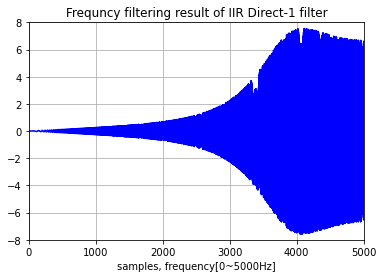

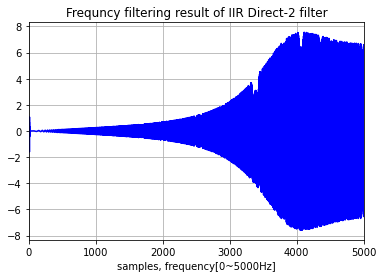

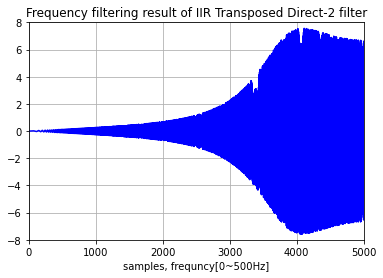

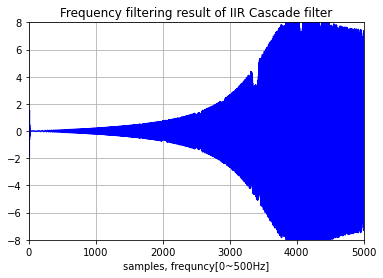

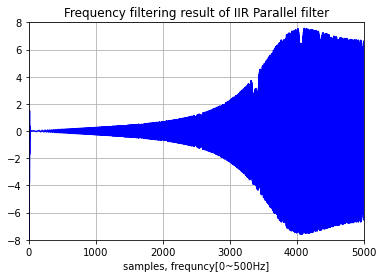

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

def IIR_direct_1(x):     #제1 직접형 IIR 필터
    y=[0]*tn
    v=[0]*tn
    for n in range(4, len(x)):
        v[n]=1/16*x[n]-3/16*x[n-1]+11/16*x[n-2]-27/16*x[n-3]+18/16*x[n-4]
        y[n]=v[n]-12/16*y[n-1]-2/16*y[n-2]+4/16*y[n-3]+1/16*y[n-4]
    return y

def IIR_direct_2(x):     #제2 직접형 IIR 필터
    y=[0]*tn
    v=[0]*tn
    for n in range(4, len(x)):
        v[n]=x[n]-12/16*v[n-1]-2/16*v[n-2]+4/16*v[n-3]+1/16*v[n-4]
        y[n]=1/16*v[n]-3/16*v[n-1]+11/16*v[n-2]-27/16*v[n-3]+18/16*v[n-4]
    return y

def IIR_transposed_direct_2(x):     #전치 제2 직접형 IIR 필터
    y=[0]*tn
    v=[0]*tn
    for n in range(4, len(x)):
        y[n]=1/16*x[n]+(-3/16*x[n-1]-12/16*y[n-1])+(11/16*x[n-2]-2/16*y[n-2])\
        +(-27/16*x[n-3]+4/16*y[n-3])+(18/16*x[n-4]+1/16*y[n-4])
    return y

def IIR_cascade(x):     #직렬형 IIR 필터
    y=[0]*tn
    v=[0]*tn
    for n in range(4, len(x)):
        v[n]=x[n]-v[n-1]+(9*x[n-2]-0.5*v[n-2])
        y[n]=1/16*(v[n]+(-3*v[n-1]+0.25*y[n-1])+(2*v[n-2]+0.125*y[n-2]))
    return y

def IIR_parallel(x):     #병렬형 IIR 필터
    y=[0]*tn
    v1=[0]*tn
    v2=[0]*tn
    for n in range(4, len(x)):
        v1[n]=-10.05*x[n]-3.95*x[n-1]-v1[n-1]-0.5*v1[n-2]
        v2[n]=28.1125*x[n]-13.3625*x[n-1]+0.25*v2[n-1]+0.125*v2[n-2]
        y[n]=-18*x[n]+v1[n]+v2[n]
    return y


tn=5000 # 총 데이터 샘플 수
t=np.linspace(0,1,tn) # x축 설정
input=chirp(t, f0=10, t1=0.2, f1=500, method='linear') #  처프 신호 발생, 10hz 부터 t1동안(0.2초) 500hz까지 x축 따라서


IIR_direct_1_output=[0]*tn # 필터 출력 어레이 설정
IIR_direct_1_output=IIR_direct_1(input) # 필터 출력 계산
plt.figure(0)
plt.plot(IIR_direct_1_output, "b"); plt.xlim(0, 5000) # 총 데이터 샘플 수
plt.xlabel("samples, frequency[0~5000Hz]"); plt.ylim(-8,8); plt.grid()
plt.title("Frequncy filtering result of IIR Direct-1 filter")

IIR_direct_2_output=[0]*tn # 필터 출력 어레이 설정
IIR_direct_2_output=IIR_direct_2(input) # 필터 출력 계산
plt.figure(1)
plt.plot(IIR_direct_2_output, "b"); plt.xlim(0, 5000) # 총 데이터 샘플 수
plt.xlabel("samples, frequency[0~5000Hz]"); plt.grid()
plt.title("Frequncy filtering result of IIR Direct-2 filter")

IIR_transposed_direct_2_output=[0]*tn     #필터 출력 어레이 설정
IIR_transposed_direct_2_output=IIR_transposed_direct_2(input)  #필터 출력 계산 
plt.figure(2)
plt.plot(IIR_transposed_direct_2_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.ylim(-8,8); plt.grid()
plt.title("Frequency filtering result of IIR Transposed Direct-2 filter")

IIR_cascade_output=[0]*tn     #필터 출력 어레이 설정
IIR_cascade_output=IIR_cascade(input)  #필터 출력 계산
plt.figure(3)
plt.plot(IIR_cascade_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.ylim(-8,8); plt.grid()
plt.title("Frequency filtering result of IIR Cascade filter")


IIR_parallel_output=[0]*tn     #필터 출력 어레이 설정
IIR_parallel_output=IIR_parallel(input)  #필터 출력 계산
plt.figure(4)
plt.plot(IIR_parallel_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.ylim(-8,8); plt.grid()
plt.title("Frequency filtering result of IIR Parallel filter")

# 이 IIR 필터는 크기가 약 8배 증폭되고 차단 주파수(cut-off)가 약 350Hz인 고주파 통과 필터이다.

Text(0.5, 1.0, 'Frequency filtering result of FIR linear phase filter')

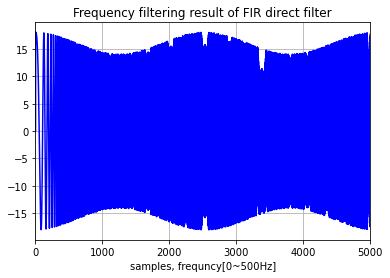

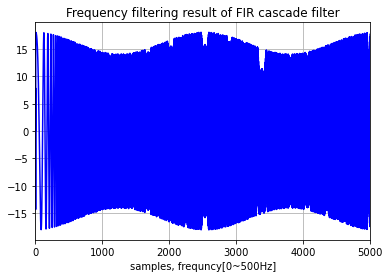

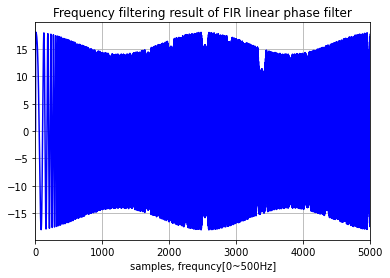

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp

def FIR_direct(x):     #직접형 FIR 필터, 7차 FIR 필터, 계수가 홀수인 경우
    y=[0]*tn
    for n in range(4, len(x)):
        y[n]=x[n]+16.0625*x[n-4]+x[n-8]
    return y

def FIR_cascade(x):     #직렬형 FIR 필터, 8차 FIR 필터, 계수가 짝수인 경우
    y=[0]*tn
    v1=[0]*tn; v2=[0]*tn; v3=[0]*tn
    for n in range(4, len(x)):
        v1[n]=x[n]+2.8284*x[n-1]+4*x[n-2]
        v2[n]=v1[n]+0.7071*v1[n-1]+0.25*v1[n-2]
        v3[n]=v2[n]-0.7071*v2[n-1]+0.25*v2[n-2]
        y[n]=v3[n]-2.8284*v3[n-1]+4*v3[n-2]
    return y

def FIR_linear_phase(x):     #선형 위상 FIR 필터, 8차 FIR 필터
    y=[0]*tn
    for n in range(4, len(x)):
        y[n]=(x[n]+x[n-8])+16.0625*x[n-4]
    return y


tn=5000     #총 데이터 샘플 수
t = np.linspace(0, 1, tn)     #x축 설정
input = chirp(t, f0=10, t1=0.2, f1=500, method='linear')     #처퍼신호 발생

Filter_output=[0]*tn     #필터 출력 어레이 설정
Filter_output=FIR_direct(input)    #필터 출력 계산 
plt.figure(0)
plt.plot(Filter_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.grid()
plt.title("Frequency filtering result of FIR direct filter")

Filter_output=[0]*tn     #필터 출력 어레이 설정
Filter_output=FIR_cascade(input)    #필터 출력 계산 
plt.figure(1)
plt.plot(Filter_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.grid()
plt.title("Frequency filtering result of FIR cascade filter")

Filter_output=[0]*tn     #필터 출력 어레이 설정
Filter_output=FIR_linear_phase(input)    #필터 출력 계산 
plt.figure(2)
plt.plot(Filter_output,"b"); plt.xlim(0,5000)
plt.xlabel("samples, frequncy[0~500Hz]"); plt.grid()
plt.title("Frequency filtering result of FIR linear phase filter")

